In [1]:
import sys
lib = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\python_playground\classifying-response-to-immunotherapy\utilities\droplet_dataset'
lib2 = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\python_playground\classifying-response-to-immunotherapy\utilities'
lib3 = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\python_playground\classifying-response-to-immunotherapy\data_analysis'
lib4 = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\python_playground\classifying-response-to-immunotherapy'
sys.path.append(lib)
sys.path.append(lib2)
sys.path.append(lib3)
sys.path.append(lib4)

In [2]:
import os
from os.path import join
import sklearn
from droplet_dataset import *
from utilities import *
from matplotlib import pyplot
import numpy as np
import scipy
import pickle
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import random
from scipy.stats import pearsonr
from matplotlib.pyplot import figure
sklearn.__version__
%matplotlib notebook

In [3]:
# functions:
def mitochondria_content_threshold(percetage_of_mitochondria, threshold):
    """
    Return threshold_text, number of cells having mit content < threshold, percentage of cells having mit content < threshold.
    """
    indexes = np.where(percetage_of_mitochondria > threshold)
    print(f'number of cells which their mitochondria genes account more than {threshold*100}% : {len(mitochondria_genes[indexes])}')
    print(f'the portion of cells we would drop: {round(len(mitochondria_genes[indexes])/counts.shape[0]*100, 3)}%')
    threshold_text = f'{len(mitochondria_genes[indexes])} cells {round(len(mitochondria_genes[indexes])/counts.shape[0]*100, 3)}%  \n will be removed'
    return threshold_text, len(mitochondria_genes[indexes]), round(len(mitochondria_genes[indexes])/counts.shape[0]*100, 3)


# The portion of mitochondria content for one sample
* Shows the data of removing apoptosis cells using two different selected threshold. Graphs:
 1. Histogram of percetage of mitochondria content.
 2. Plot: X - Percetage of mitochondria content. Y - Number of reads
* Option to save the graphs

   #### PLEASE SELECT SAMPLE ID AND 2 THRESHOLDS

count shape (2831, 32738)
number of cells 2831
number of genes 32738


<IPython.core.display.Javascript object>


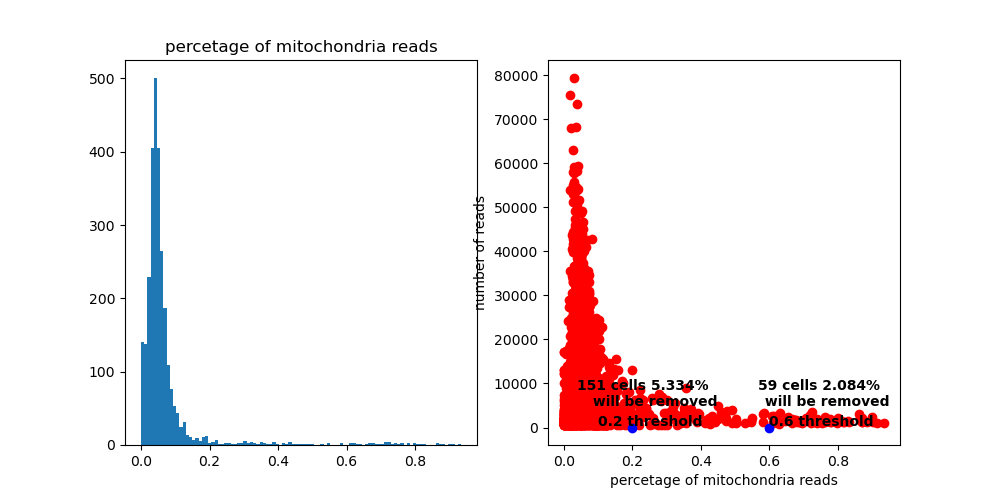

number of cells which their mitochondria genes account more than 20.0% : 151
the portion of cells we would drop: 5.334%
number of cells which their mitochondria genes account more than 60.0% : 59
the portion of cells we would drop: 2.084%


Text(0.95, 4200, '59 cells 2.084%  \n will be removed')

In [10]:
# select sample id
sample_id = 'M152'
# select the threshold you're interested in.
threshold_1 = 0.2
threshold_2 = 0.6


sample = fr'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\Data\droplet_seq\new_data_3.10.21\ROW_DATA\{sample_id}.pkl'
data = pickle.load(open(sample, 'rb'))
genes = data[3]#data.gene_names
counts = data[0]#data.counts
print(f'count shape {counts.shape}')
print(f'number of cells {counts.shape[0]}')
print(f'number of genes {counts.shape[1]}')


counting_reads = counts.sum(axis=1)
mitochondria_genes = counts[:, [s.startswith('MT-') for s in genes]].sum(axis=1)


fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

# Extract mitochondria content.
counting_reads = counting_reads.astype(np.float64)
mitochondria_genes = mitochondria_genes.astype(np.float64)
percetage_of_mitochondria = np.divide(mitochondria_genes, counting_reads, out=np.zeros_like(counting_reads), where=counting_reads!=0)


# 1. Histogram of percetage of mitochondria content.
axs[0].hist(percetage_of_mitochondria, bins=100)
axs[0].set_title("percetage of mitochondria reads")


threshold_1_text, _, _ = mitochondria_content_threshold(percetage_of_mitochondria, threshold_1)
threshold_2_text, _, _ = mitochondria_content_threshold(percetage_of_mitochondria, threshold_2)


# 2. Plot of  X - Percetage of mitochondria content. Y - Number of reads.
axs[1].plot(percetage_of_mitochondria, counting_reads, 'ro')
axs[1].plot([threshold_1, threshold_2], [0, 0], 'bo')
axs[1].set_ylabel('number of reads')
axs[1].set_xlabel('percetage of mitochondria reads')


# Polishes it a little bit.
plt.annotate(f"{threshold_1} threshold",xy=(0.1,400), weight='bold')
plt.annotate(f"{threshold_2} threshold",xy=(0.6,400), weight='bold')
plt.text(0.45,4200, threshold_1_text,
        verticalalignment='bottom', horizontalalignment='right',
        color='black',weight='bold', fontsize=10)
plt.text(0.95,4200, threshold_2_text,
        verticalalignment='bottom', horizontalalignment='right',
        color='black',weight='bold', fontsize=10)


# if you want to save it, remove the comment
# fig.savefig(rf'C:\Users\itay\Desktop\Technion studies\Keren Laboratory\python_playground\output files\apoptosis\{sample_id}.png')


# The portion of mitochondria content for all samples
* Shows the data of removing apoptosis cells using two different selected threshold. Graphs:
 1. Histogram of percetage of mitochondria content.
 2. Plot: X - Percetage of mitochondria content. Y - Number of reads
* Option to save the graphs

    #### PLEASE SELECT: Input/output path and two threshold.

<IPython.core.display.Javascript object>


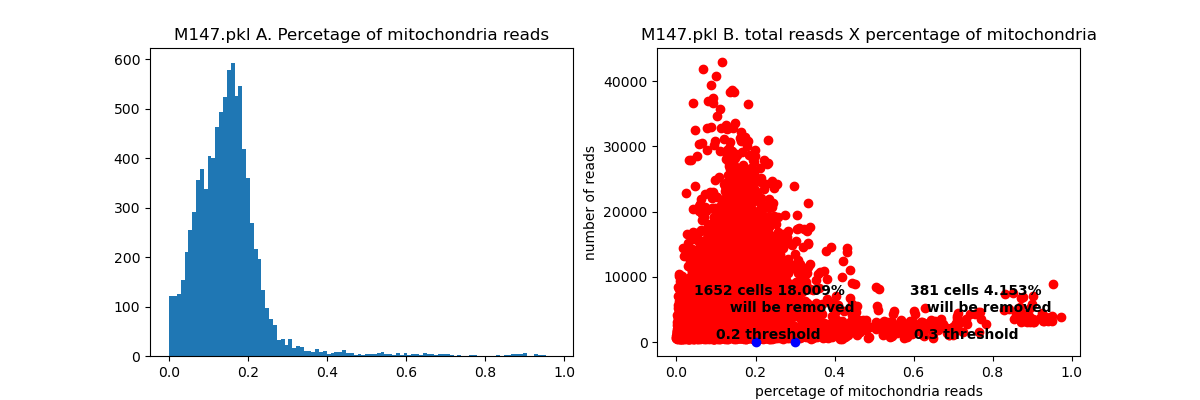

M147.pkl
number of cells which their mitochondria genes account more than 20.0% : 1652
the portion of cells we would drop: 18.009%
number of cells which their mitochondria genes account more than 30.0% : 381
the portion of cells we would drop: 4.153%


<IPython.core.display.Javascript object>


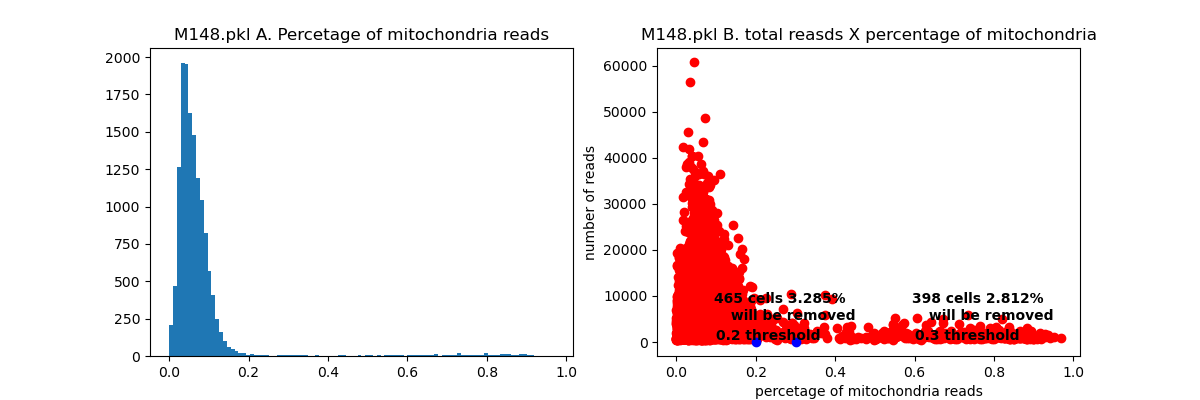

M148.pkl
number of cells which their mitochondria genes account more than 20.0% : 465
the portion of cells we would drop: 3.285%
number of cells which their mitochondria genes account more than 30.0% : 398
the portion of cells we would drop: 2.812%


<IPython.core.display.Javascript object>


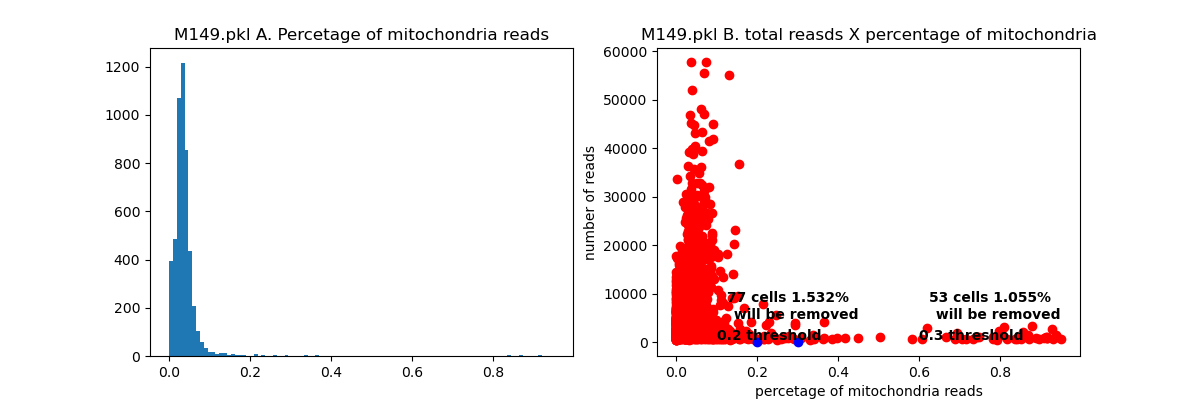

M149.pkl
number of cells which their mitochondria genes account more than 20.0% : 77
the portion of cells we would drop: 1.532%
number of cells which their mitochondria genes account more than 30.0% : 53
the portion of cells we would drop: 1.055%


<IPython.core.display.Javascript object>


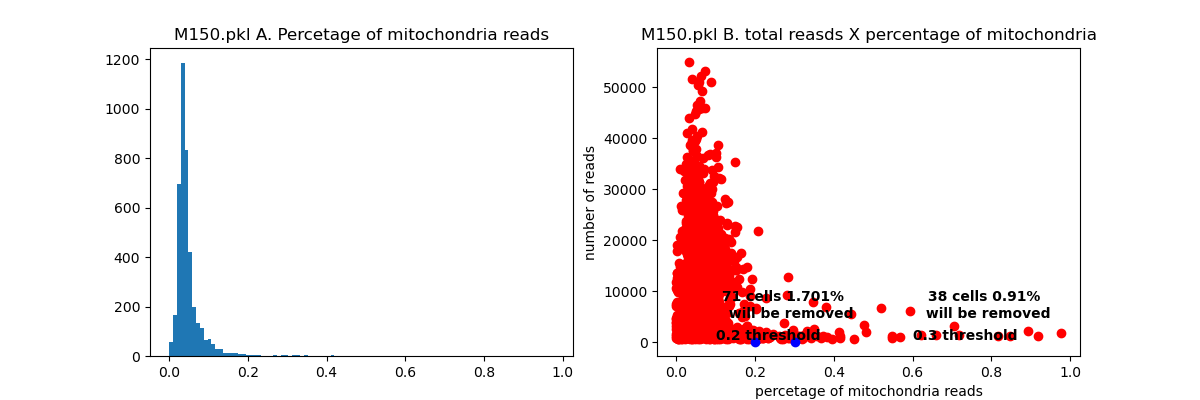

M150.pkl
number of cells which their mitochondria genes account more than 20.0% : 71
the portion of cells we would drop: 1.701%
number of cells which their mitochondria genes account more than 30.0% : 38
the portion of cells we would drop: 0.91%


<IPython.core.display.Javascript object>


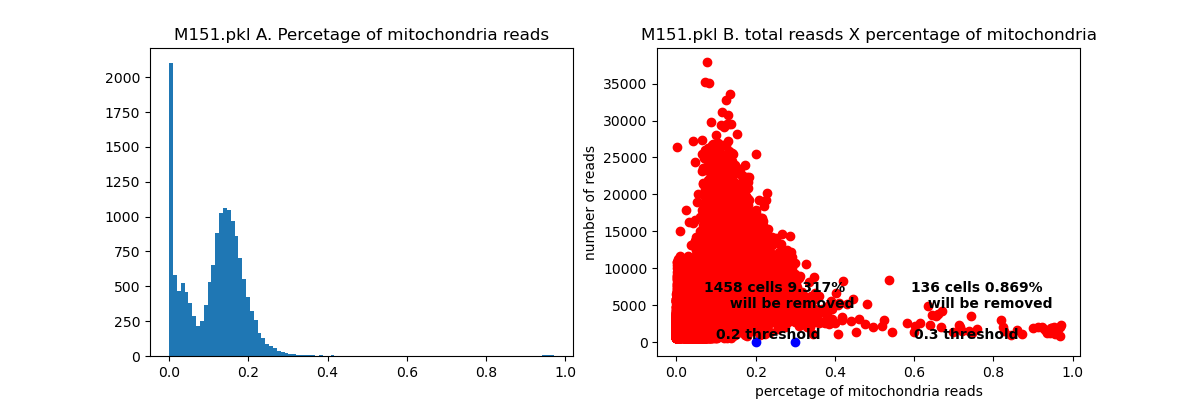

M151.pkl
number of cells which their mitochondria genes account more than 20.0% : 1458
the portion of cells we would drop: 9.317%
number of cells which their mitochondria genes account more than 30.0% : 136
the portion of cells we would drop: 0.869%


<IPython.core.display.Javascript object>


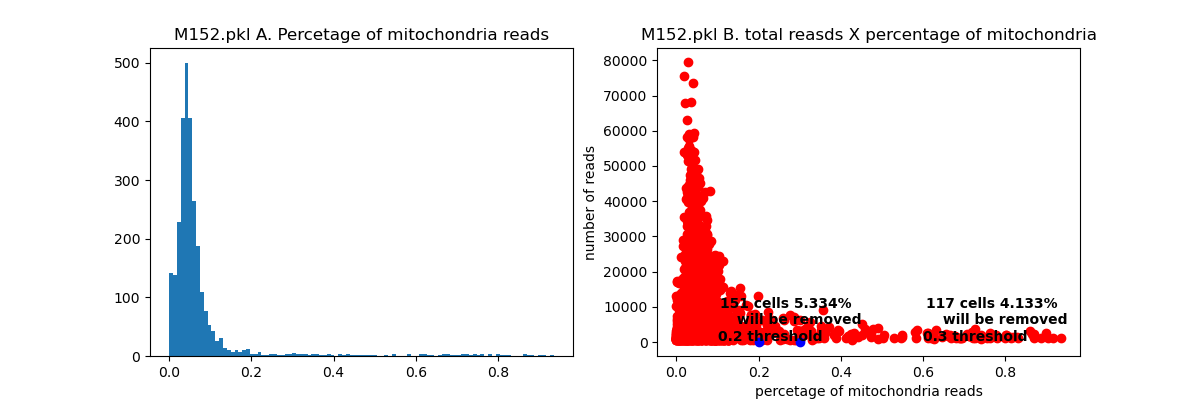

M152.pkl
number of cells which their mitochondria genes account more than 20.0% : 151
the portion of cells we would drop: 5.334%
number of cells which their mitochondria genes account more than 30.0% : 117
the portion of cells we would drop: 4.133%


<IPython.core.display.Javascript object>


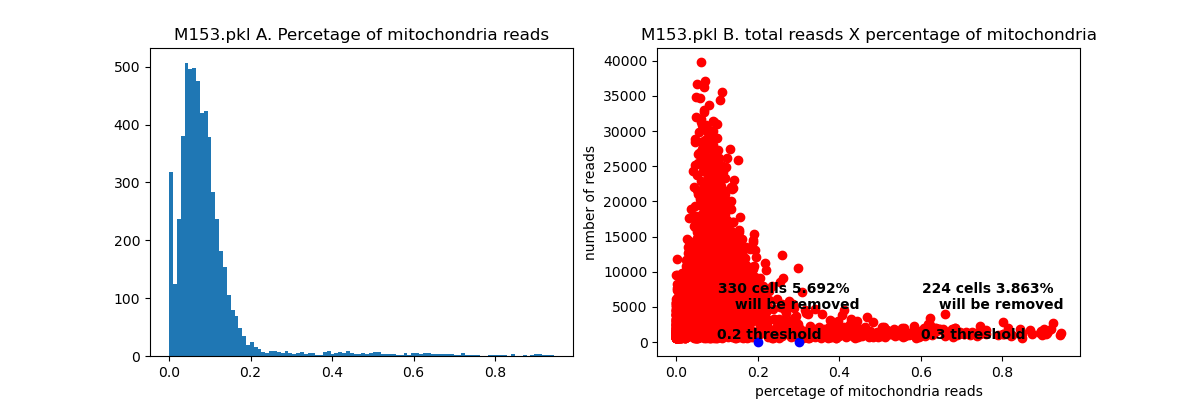

M153.pkl
number of cells which their mitochondria genes account more than 20.0% : 330
the portion of cells we would drop: 5.692%
number of cells which their mitochondria genes account more than 30.0% : 224
the portion of cells we would drop: 3.863%


<IPython.core.display.Javascript object>


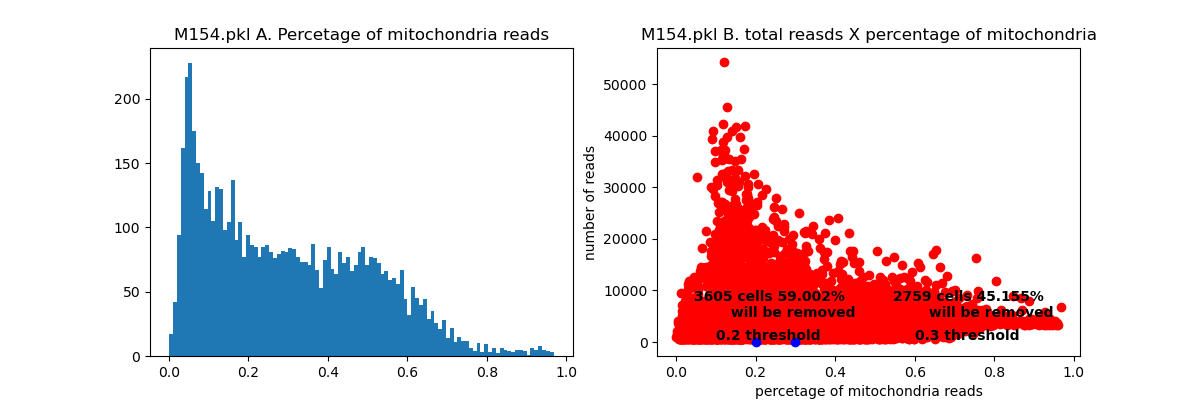

M154.pkl
number of cells which their mitochondria genes account more than 20.0% : 3605
the portion of cells we would drop: 59.002%
number of cells which their mitochondria genes account more than 30.0% : 2759
the portion of cells we would drop: 45.155%


<IPython.core.display.Javascript object>


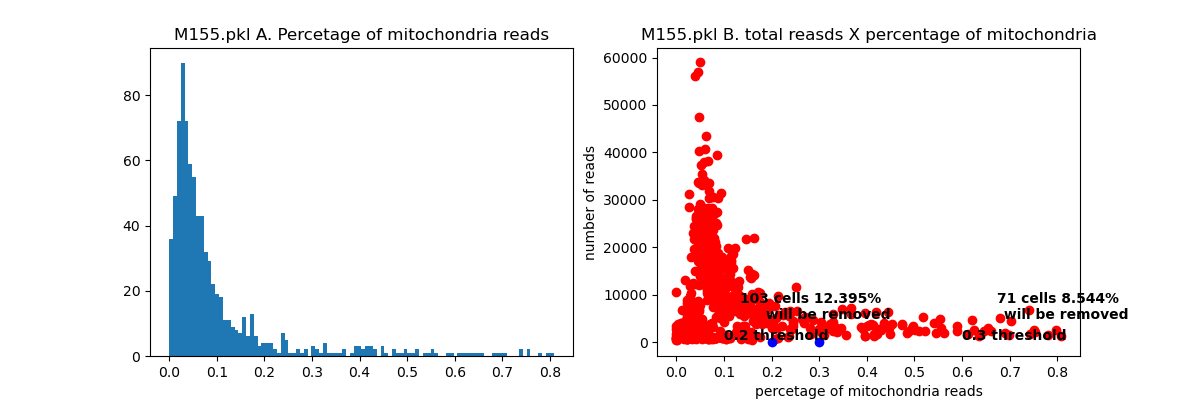

M155.pkl
number of cells which their mitochondria genes account more than 20.0% : 103
the portion of cells we would drop: 12.395%
number of cells which their mitochondria genes account more than 30.0% : 71
the portion of cells we would drop: 8.544%


<IPython.core.display.Javascript object>


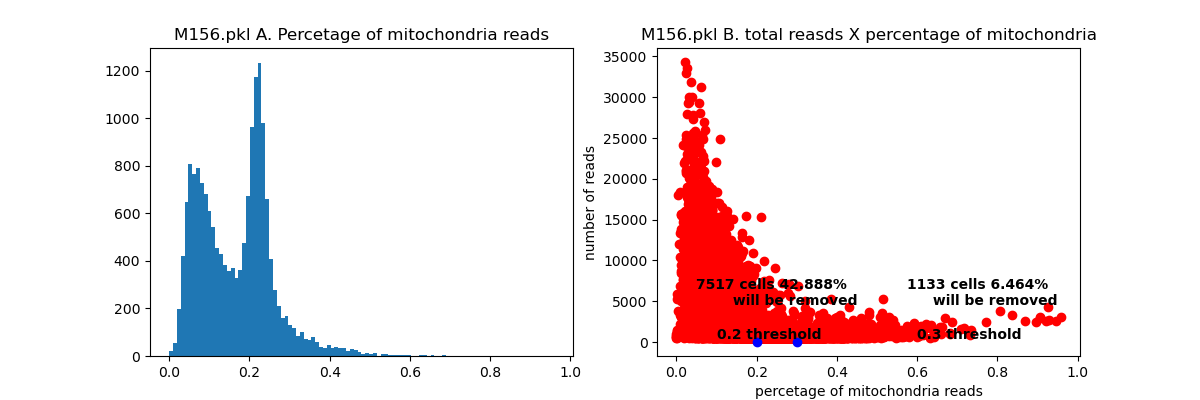

M156.pkl
number of cells which their mitochondria genes account more than 20.0% : 7517
the portion of cells we would drop: 42.888%
number of cells which their mitochondria genes account more than 30.0% : 1133
the portion of cells we would drop: 6.464%


<IPython.core.display.Javascript object>


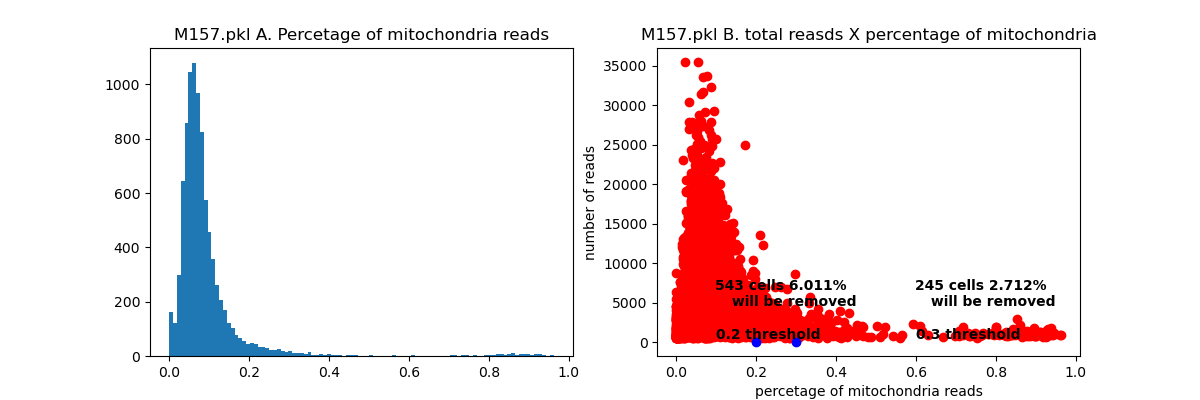

M157.pkl
number of cells which their mitochondria genes account more than 20.0% : 543
the portion of cells we would drop: 6.011%
number of cells which their mitochondria genes account more than 30.0% : 245
the portion of cells we would drop: 2.712%


<IPython.core.display.Javascript object>


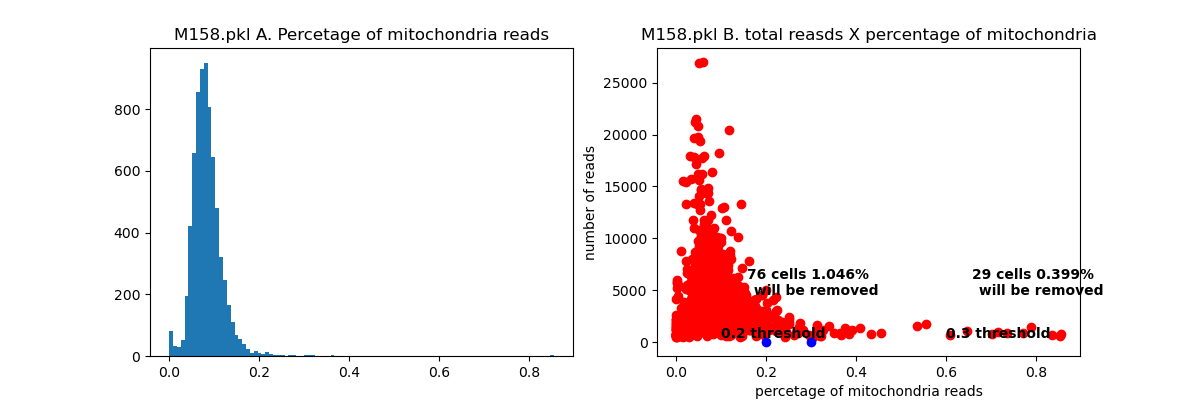

M158.pkl
number of cells which their mitochondria genes account more than 20.0% : 76
the portion of cells we would drop: 1.046%
number of cells which their mitochondria genes account more than 30.0% : 29
the portion of cells we would drop: 0.399%


<IPython.core.display.Javascript object>


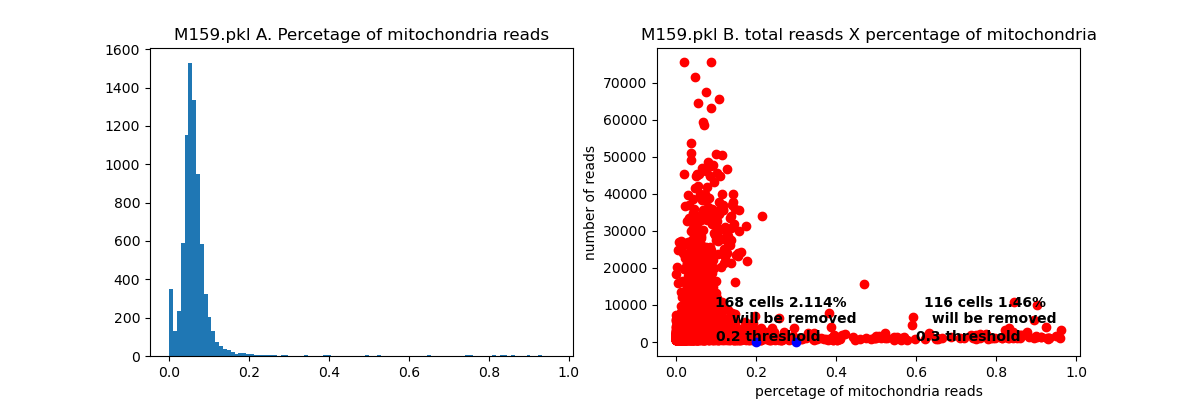

M159.pkl
number of cells which their mitochondria genes account more than 20.0% : 168
the portion of cells we would drop: 2.114%
number of cells which their mitochondria genes account more than 30.0% : 116
the portion of cells we would drop: 1.46%


<IPython.core.display.Javascript object>


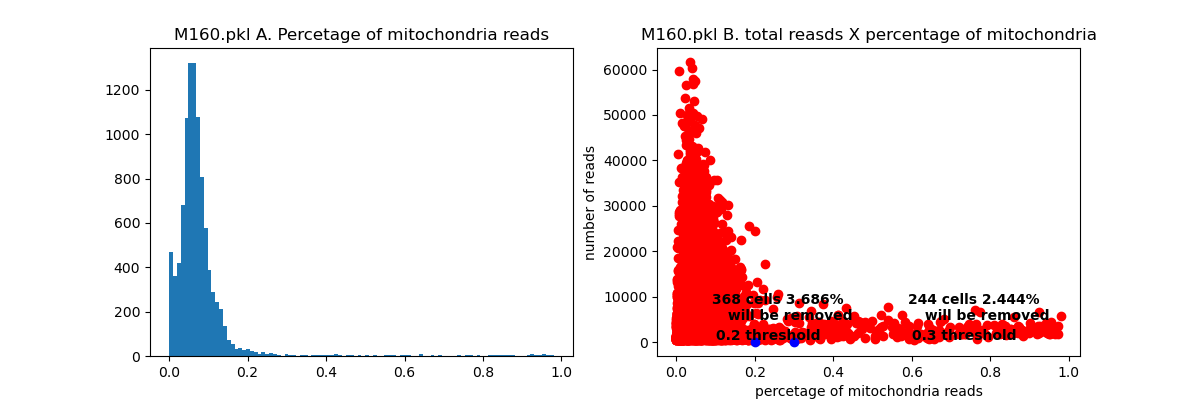

M160.pkl
number of cells which their mitochondria genes account more than 20.0% : 368
the portion of cells we would drop: 3.686%
number of cells which their mitochondria genes account more than 30.0% : 244
the portion of cells we would drop: 2.444%


<IPython.core.display.Javascript object>


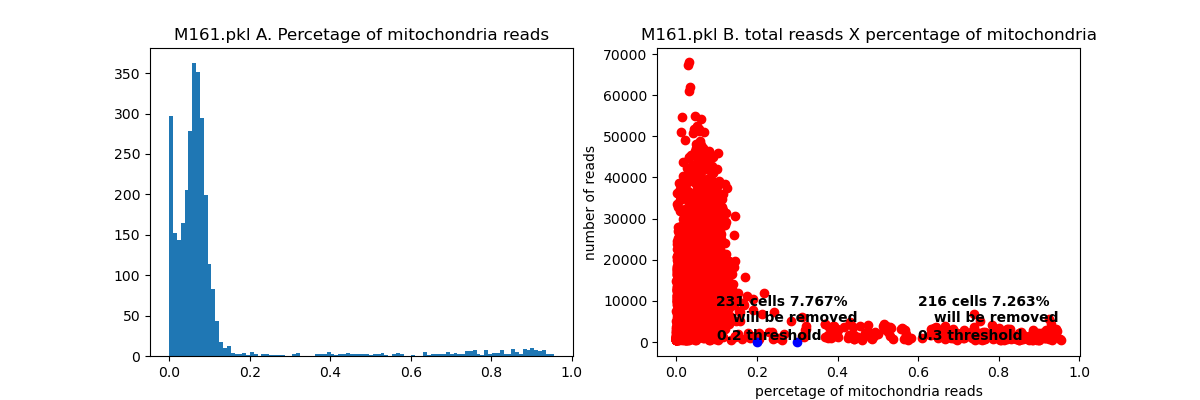

M161.pkl
number of cells which their mitochondria genes account more than 20.0% : 231
the portion of cells we would drop: 7.767%
number of cells which their mitochondria genes account more than 30.0% : 216
the portion of cells we would drop: 7.263%


<IPython.core.display.Javascript object>


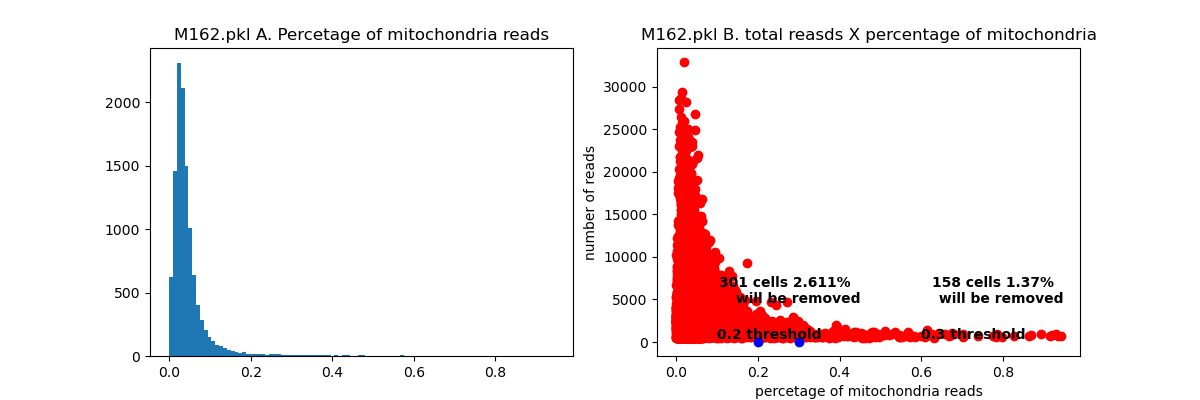

M162.pkl
number of cells which their mitochondria genes account more than 20.0% : 301
the portion of cells we would drop: 2.611%
number of cells which their mitochondria genes account more than 30.0% : 158
the portion of cells we would drop: 1.37%


<IPython.core.display.Javascript object>


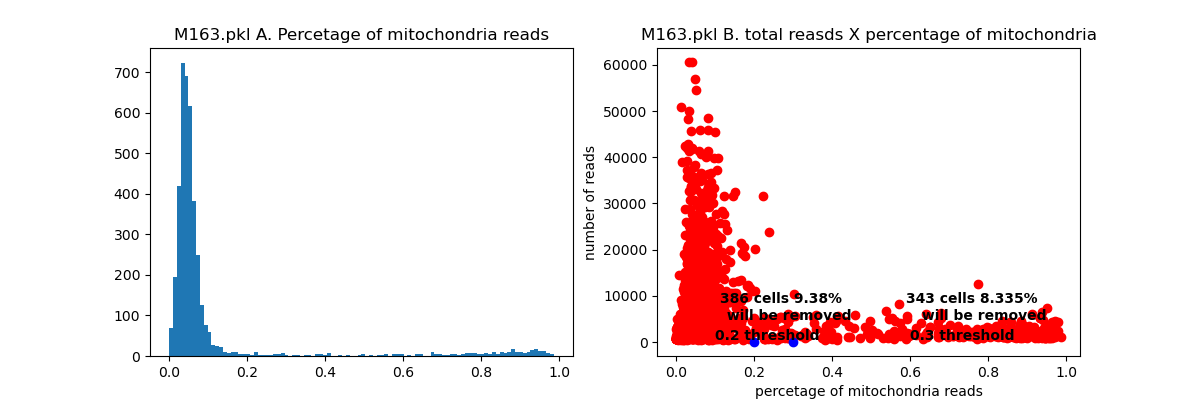

M163.pkl
number of cells which their mitochondria genes account more than 20.0% : 386
the portion of cells we would drop: 9.38%
number of cells which their mitochondria genes account more than 30.0% : 343
the portion of cells we would drop: 8.335%


<IPython.core.display.Javascript object>


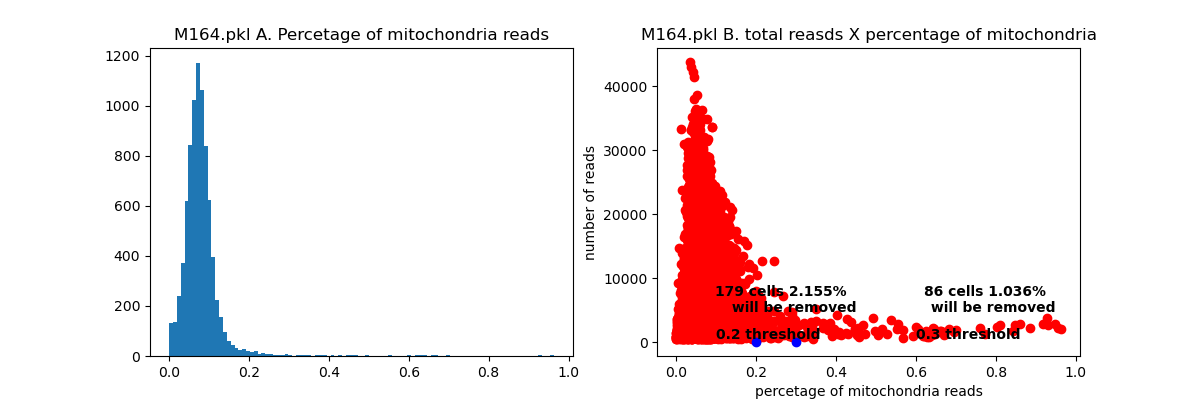

M164.pkl
number of cells which their mitochondria genes account more than 20.0% : 179
the portion of cells we would drop: 2.155%
number of cells which their mitochondria genes account more than 30.0% : 86
the portion of cells we would drop: 1.036%


<IPython.core.display.Javascript object>


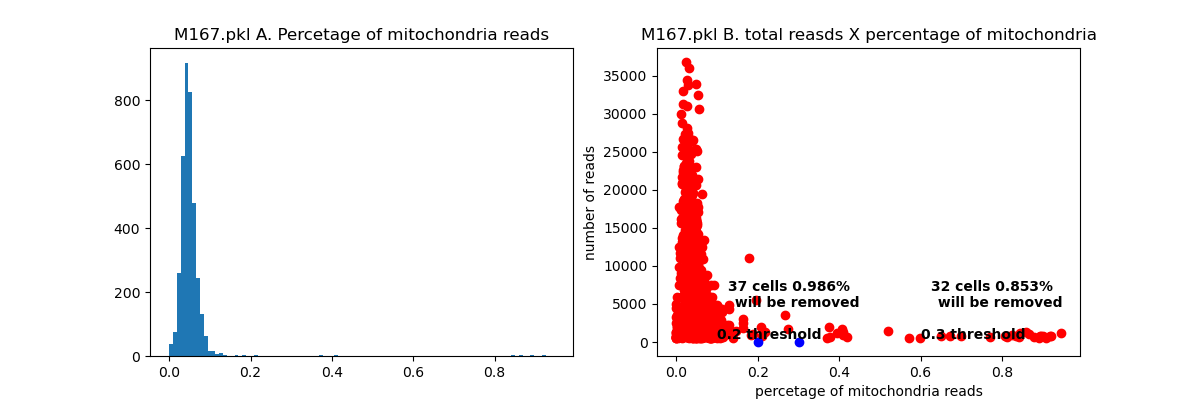

M167.pkl
number of cells which their mitochondria genes account more than 20.0% : 37
the portion of cells we would drop: 0.986%
number of cells which their mitochondria genes account more than 30.0% : 32
the portion of cells we would drop: 0.853%


<ipython-input-17-b4667f98778c>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


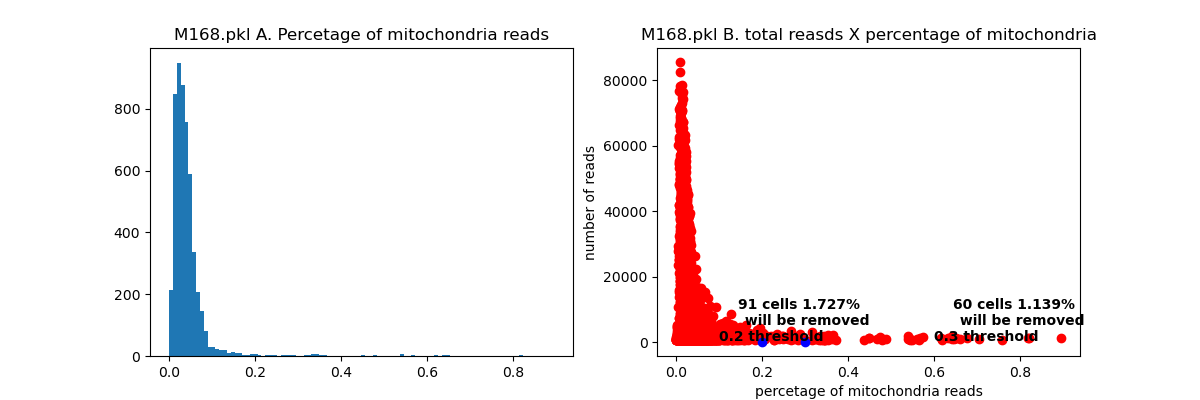

M168.pkl
number of cells which their mitochondria genes account more than 20.0% : 91
the portion of cells we would drop: 1.727%
number of cells which their mitochondria genes account more than 30.0% : 60
the portion of cells we would drop: 1.139%


<IPython.core.display.Javascript object>


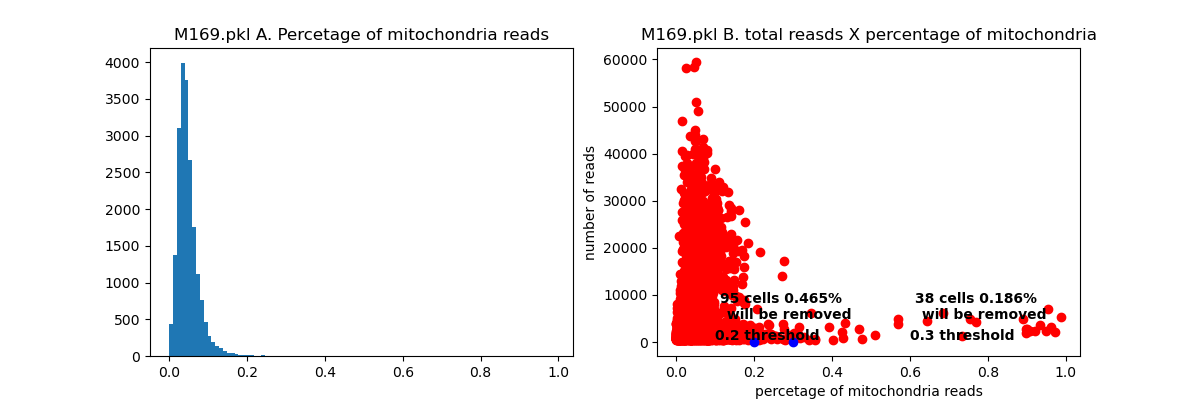

M169.pkl
number of cells which their mitochondria genes account more than 20.0% : 95
the portion of cells we would drop: 0.465%
number of cells which their mitochondria genes account more than 30.0% : 38
the portion of cells we would drop: 0.186%


<IPython.core.display.Javascript object>


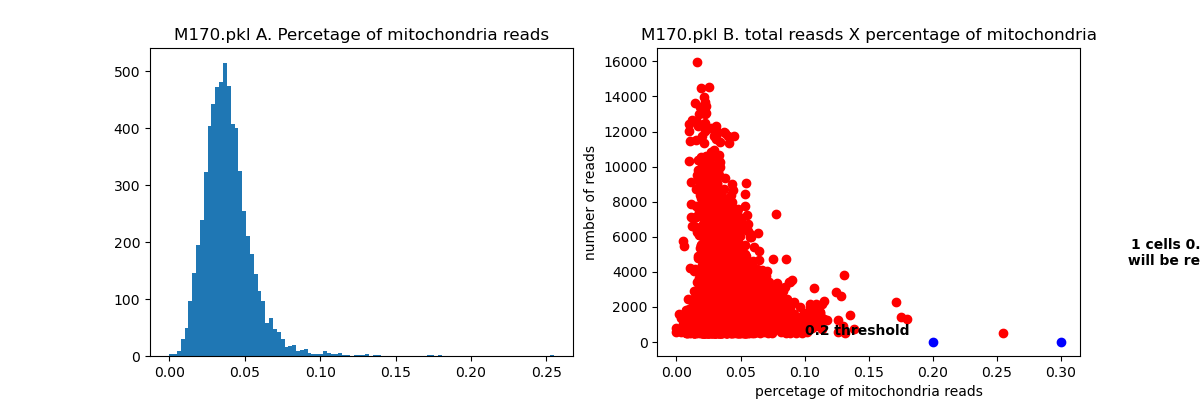

M170.pkl
number of cells which their mitochondria genes account more than 20.0% : 1
the portion of cells we would drop: 0.016%
number of cells which their mitochondria genes account more than 30.0% : 0
the portion of cells we would drop: 0.0%


<IPython.core.display.Javascript object>


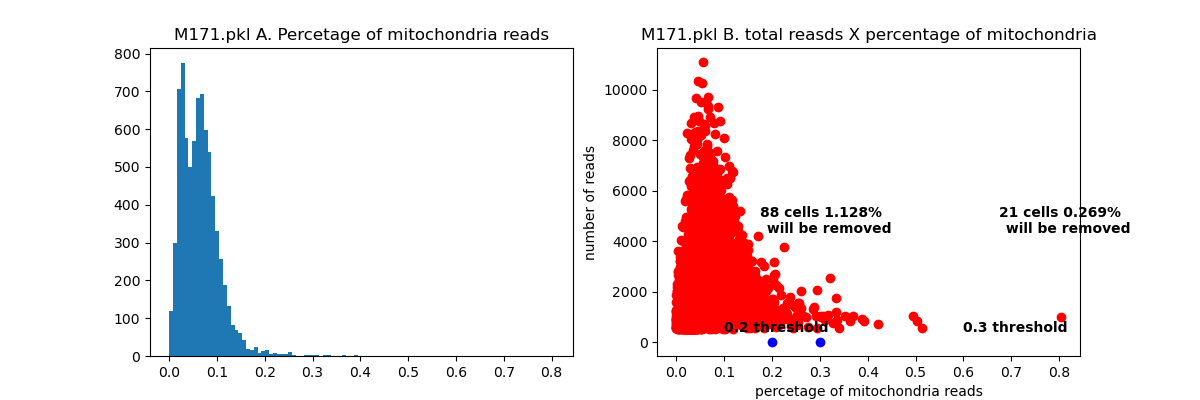

M171.pkl
number of cells which their mitochondria genes account more than 20.0% : 88
the portion of cells we would drop: 1.128%
number of cells which their mitochondria genes account more than 30.0% : 21
the portion of cells we would drop: 0.269%


<IPython.core.display.Javascript object>


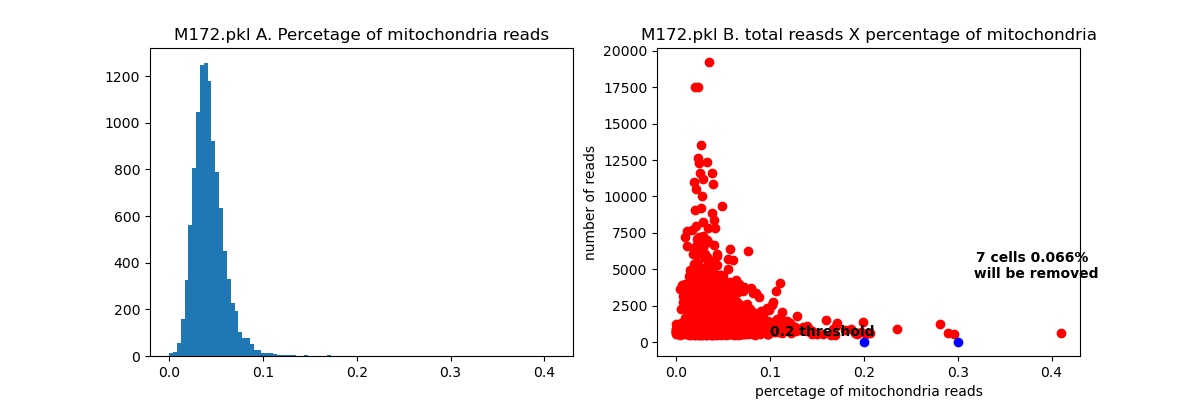

M172.pkl
number of cells which their mitochondria genes account more than 20.0% : 7
the portion of cells we would drop: 0.066%
number of cells which their mitochondria genes account more than 30.0% : 1
the portion of cells we would drop: 0.009%


<IPython.core.display.Javascript object>


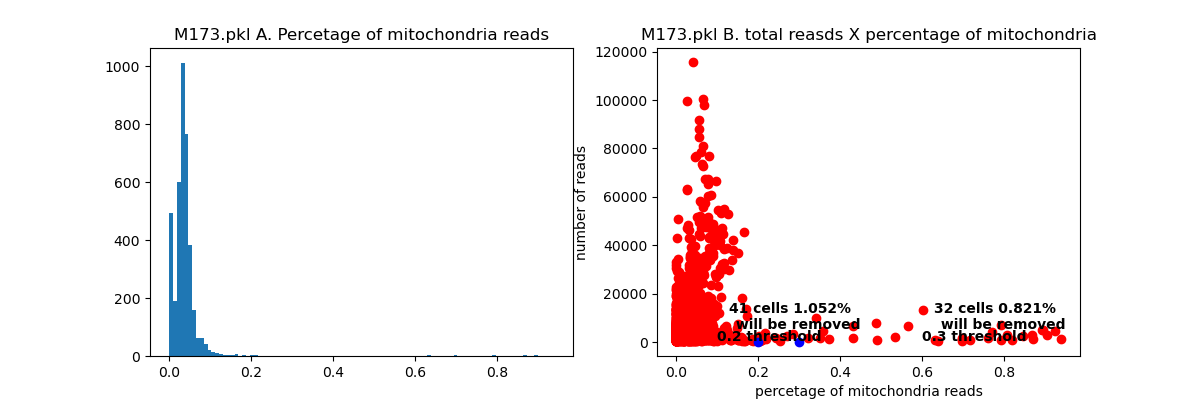

M173.pkl
number of cells which their mitochondria genes account more than 20.0% : 41
the portion of cells we would drop: 1.052%
number of cells which their mitochondria genes account more than 30.0% : 32
the portion of cells we would drop: 0.821%


In [17]:
SAMPLES_PATH = fr'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\Data\droplet_seq\new_data_3.10.21\ROW_DATA'
OUTPUT_PATH = fr'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\python_playground\outputs\new_data_3.10.21_outputs\apoptosis\6.10.20'
threshold_1 = 0.2
threshold_2 = 0.3




thr_1_percent = []
thr_1_count = []
thr_2_percent = []
thr_2_count = []

folders = [subfolder for subfolder in os.listdir(SAMPLES_PATH)]
for s_idx, sample_id in enumerate(folders):
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(12, 4) # W X H
    print(sample_id)

    # Extract sample.
    sample_path = join(SAMPLES_PATH, fr'{sample_id}')
    data = pickle.load(open(sample_path, 'rb'))
    genes = data[3]#data.gene_names
    counts = data[0]#data.counts
    counting_reads = counts.sum(axis=1)
    mitochondria_genes = counts[:, [s.startswith('MT-') for s in genes]].sum(axis=1)
    

    # Extract mitochondria content.
    counting_reads = counting_reads.astype(np.float64)
    mitochondria_genes = mitochondria_genes.astype(np.float64)
    percetage_of_mitochondria = np.divide(mitochondria_genes, counting_reads, out=np.zeros_like(counting_reads), where=counting_reads!=0)


    # 1. Histogram of percetage of mitochondria content.
    axs[0].hist(percetage_of_mitochondria, bins=100)
    axs[0].set_title(f"{sample_id} A. Percetage of mitochondria reads")


    threshold_1_text, thre1_count, thre1_percent = mitochondria_content_threshold(percetage_of_mitochondria, threshold_1)
    threshold_2_text, thre2_count, thre2_percent = mitochondria_content_threshold(percetage_of_mitochondria, threshold_2)   
    thr_1_count.append(thre1_count)
    thr_1_percent.append(thre1_percent)
    thr_2_count.append(thre2_count)
    thr_2_percent.append(thre2_percent)
    

    # 2. Plot of  X - Percetage of mitochondria content. Y - Number of reads.
    axs[1].plot(percetage_of_mitochondria, counting_reads, 'ro')
    axs[1].plot([threshold_1, threshold_2], [0, 0], 'bo')
    axs[1].set_title(f"{sample_id} B. total reasds X percentage of mitochondria")
    axs[1].set_ylabel('number of reads')
    axs[1].set_xlabel('percetage of mitochondria reads')


    # Polishes it a little bit.
    plt.annotate(f"{threshold_1} threshold",xy=(0.1,400), weight='bold')
    plt.annotate(f"{threshold_2} threshold",xy=(0.6,400), weight='bold')
    plt.text(0.45,4200, threshold_1_text,
            verticalalignment='bottom', horizontalalignment='right',
            color='black',weight='bold', fontsize=10)
    plt.text(0.95,4200, threshold_2_text,
            verticalalignment='bottom', horizontalalignment='right',
            color='black',weight='bold', fontsize=10)
    
    fig.savefig(join(OUTPUT_PATH, rf'{sample_id[:-4]}.png'))

    
csv_path = join(OUTPUT_PATH, f'apoptosis_threshold_{threshold_1}_{threshold_2}.csv')
pandas.DataFrame({'sample': folders,
                  f'threshold {threshold_1} number of cells will be removed': thr_1_count,
                  f'threshold {threshold_1} percentage of cells will be removed': thr_1_percent,
                 f'threshold {threshold_2} number of cells will be removed': thr_2_count,
                 f'threshold {threshold_2} percentage of cells will be removed': thr_2_percent,}).to_csv(csv_path)
    


# Use cloupe Clusters to remove Apoptosis
Specify the sample id and interesting cluster numbers you want to examine their removal (assign cells belong to these clusters  as apoptosis).

count shape (17527, 32738)
number of cells 17527
number of genes 32738
cluster portion 0.48627831345923433
counts shape (8523, 32738)


<IPython.core.display.Javascript object>


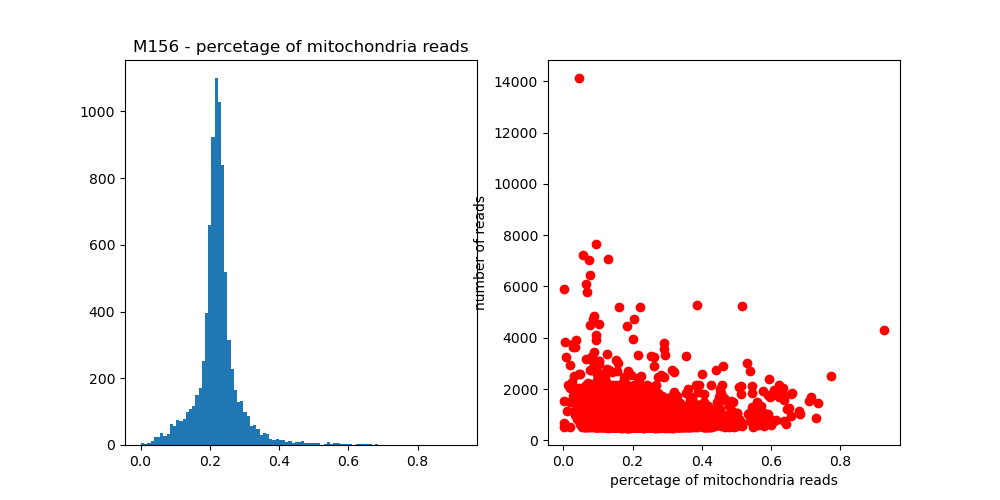

Text(0.5, 0, 'percetage of mitochondria reads')

In [41]:
# select sample id
sample_id = 'M156'
intersting_cluster = [1,3]
present_what_left = False # True - show the cells will remain after apoptosis removal. False -show apoptosis cells.




# Sample extraction
sample = fr'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\Data\droplet_seq\new_data_3.10.21\ROW_DATA\{sample_id}.pkl'
# sample = fr'D:\Technion studies\Keren Laboratory\Data\droplet_seq\all_samples\{sample_id}\RNA_sample.pkl'
data = pickle.load(open(sample, 'rb'))
genes = data[3]#data.gene_names
counts = data[0]#data.counts
print(f'count shape {counts.shape}')
print(f'number of cells {counts.shape[0]}')
print(f'number of genes {counts.shape[1]}')


# Clusters extraction
CLUSTER_FOLDER_PATH = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\Data\Melanoma\clusters'
cluster_table_path = join(CLUSTER_FOLDER_PATH, f'Graph_based_{sample_id}.csv')
cluster_df = pd.read_csv(cluster_table_path)



cluster_indexes = np.array([int(s.split(' ')[1]) for s in list(cluster_df['Graph-based'])])
cluster_indexes = np.isin(cluster_indexes, intersting_cluster)
print(f'cluster portion {sum(cluster_indexes)/counts.shape[0]}')
if present_what_left:
    counts = counts[cluster_indexes != True]
else: 
    counts = counts[cluster_indexes]
print(f'counts shape {counts.shape}')


# Extract mitochondria content.
counting_reads = counts.sum(axis=1)
mitochondria_genes = counts[:, [s.startswith('MT-') for s in genes]].sum(axis=1)


fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)



counting_reads = counting_reads.astype(np.float64)
mitochondria_genes = mitochondria_genes.astype(np.float64)
percetage_of_mitochondria = np.divide(mitochondria_genes, counting_reads, out=np.zeros_like(counting_reads), where=counting_reads!=0)


# 1. Histogram of percetage of mitochondria content.
axs[0].hist(percetage_of_mitochondria, bins=100)
axs[0].set_title(f"{sample_id} - percetage of mitochondria reads")



# 2. Plot of  X - Percetage of mitochondria content. Y - Number of reads.
axs[1].plot(percetage_of_mitochondria, counting_reads, 'ro')
axs[1].set_ylabel('number of reads')
axs[1].set_xlabel('percetage of mitochondria reads')

# Debug

count shape (22694, 21324)
number of cells 22694
number of genes 21324


<IPython.core.display.Javascript object>


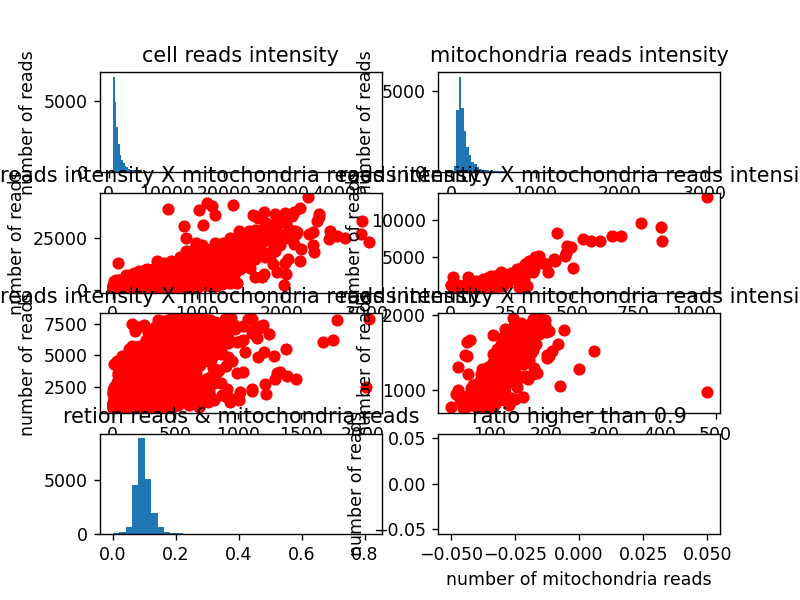

num of mitochondria genes 13
mitochondria genes ['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB']
pearson correlation  (0.9057029939265513, 0.0)
counting_reads shape  (22694,)
mitochondria_genes shape  (22694,)
number of cells which their mitochondria genes account more than 90.0% : 0
the portion of cells we would drop: 0.0%


In [20]:
# figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')

sample_id = 'M102'
sample = fr'D:\Technion studies\Keren Laboratory\Data\droplet_seq\all_samples\{sample_id}\RNA_sample.pkl'
data = pickle.load(open(sample, 'rb'))
genes = data.gene_names
counts = data.counts
print(f'count shape {counts.shape}')
print(f'number of cells {counts.shape[0]}')
print(f'number of genes {counts.shape[1]}')

fig, axs = plt.subplots(4, 2)
# fig.set_size_inches(16.5, 14.5)


counting_reads = counts.sum(axis=1)
mitochondria_genes = counts[:, [s.startswith('MT-') for s in genes]].sum(axis=1)
mit = [s for s in genes if s.startswith('MT-')]
print(f'num of mitochondria genes {len(mit)}')
print(f'mitochondria genes {mit}')
print(f'pearson correlation  {pearsonr(counting_reads, mitochondria_genes)}')
print(f'counting_reads shape  {counting_reads.shape}')
print(f'mitochondria_genes shape  {mitochondria_genes.shape}')



# plot 1 - cell reads intensity
axs[0, 0].hist(counting_reads, bins=150)
axs[0, 0].set_title("cell reads intensity")
axs[0, 0].set_ylabel('number of reads')
axs[0, 0].set_xlabel('indexes')



# plot 2
axs[0, 1].hist(mitochondria_genes, bins=100)
axs[0, 1].set_title("mitochondria reads intensity")
axs[0, 1].set_ylabel('number of reads')
axs[0, 1].set_xlabel('indexes')



# plot 3
axs[1, 0].plot(mitochondria_genes, counting_reads, 'ro')
axs[1, 0].set_title("reads intensity X mitochondria reads intensity")
axs[1, 0].set_xlabel('number of mitochondria reads')
axs[1, 0].set_ylabel('number of reads')


# plot 4
rand = random.choices(range(len(counting_reads)), k=300)
axs[1, 1].plot(mitochondria_genes[rand], counting_reads[rand], 'ro')
axs[1, 1].set_title("reads intensity X mitochondria reads intensity")
axs[1, 1].set_xlabel('number of mitochondria reads')
axs[1, 1].set_ylabel('number of reads')



# plot 5
indexes = np.where(counting_reads<8000)
counting_reads_small = counting_reads[indexes]
mitochondria_genes_small = mitochondria_genes[indexes]
axs[2, 0].plot(mitochondria_genes_small, counting_reads_small, 'ro')
axs[2, 0].set_title("reads intensity X mitochondria reads intensity")
axs[2, 0].set_xlabel('number of mitochondria reads')
axs[2, 0].set_ylabel('number of reads')


# plot 6
indexes = np.where(counting_reads<2000)
rand = random.choices(range(len(sum(indexes))), k=300)
counting_reads_small = counting_reads[indexes][rand]
mitochondria_genes_small = mitochondria_genes[indexes][rand]
axs[2, 1].plot(mitochondria_genes_small, counting_reads_small, 'ro')
axs[2, 1].set_title("reads intensity X mitochondria reads intensity")
axs[2, 1].set_xlabel('number of mitochondria reads')
axs[2, 1].set_ylabel('number of reads')



# plot 7
counting_reads = counting_reads.astype(np.float64)
mitochondria_genes = mitochondria_genes.astype(np.float64)
res = np.divide(mitochondria_genes, counting_reads, out=np.zeros_like(counting_reads), where=counting_reads!=0)
axs[3, 0].hist(res, bins=40)
axs[3, 0].set_title("retion reads & mitochondria reads")



# plot 8
ratio_of_interest = 0.9
indexes = np.where(res>ratio_of_interest)
axs[3, 1].plot(mitochondria_genes[indexes], counting_reads[indexes], 'ro')
axs[3, 1].set_title(f"ratio higher than {ratio_of_interest}")
axs[3, 1].set_xlabel('number of mitochondria reads')
axs[3, 1].set_ylabel('number of reads')
print(f'number of cells which their mitochondria genes account more than {ratio_of_interest*100}% : {len(mitochondria_genes[indexes])}')
print(f'the portion of cells we would drop: {round(len(mitochondria_genes[indexes])/counts.shape[0]*100, 3)}%')


# Debug 30.11.20

count shape (22694, 21324)
number of cells 22694
number of genes 21324


<IPython.core.display.Javascript object>


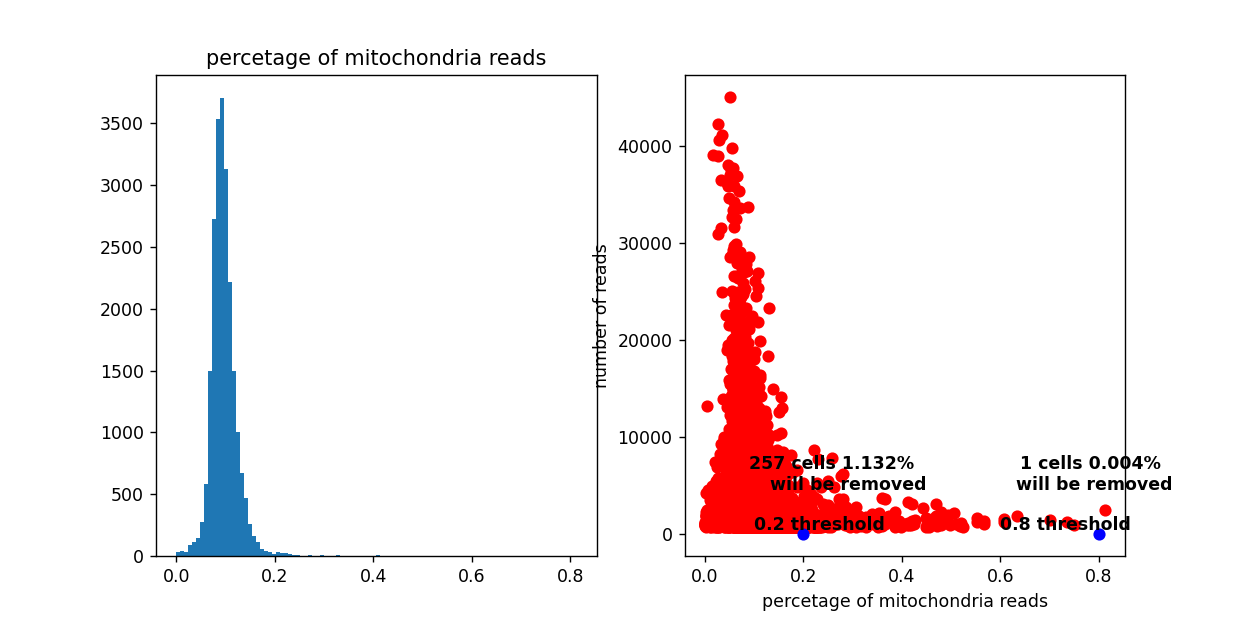

number of cells which their mitochondria genes account more than 20.0% : 257
the portion of cells we would drop: 1.132%
number of cells which their mitochondria genes account more than 80.0% : 1
the portion of cells we would drop: 0.004%


Text(0.95, 4200, '1 cells 0.004%  \n will be removed')

In [5]:






counting_reads = counts.sum(axis=1)
mitochondria_genes = counts[:, [s.startswith('MT-') for s in genes]].sum(axis=1)


fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

# Extract mitochondria content.
counting_reads = counting_reads.astype(np.float64)
mitochondria_genes = mitochondria_genes.astype(np.float64)
percetage_of_mitochondria = np.divide(mitochondria_genes, counting_reads, out=np.zeros_like(counting_reads), where=counting_reads!=0)


# 1. Histogram of percetage of mitochondria content.
axs[0].hist(percetage_of_mitochondria, bins=100)
axs[0].set_title("percetage of mitochondria reads")


threshold_1_text, _, _ = mitochondria_content_threshold(percetage_of_mitochondria, threshold_1)
threshold_2_text, _, _ = mitochondria_content_threshold(percetage_of_mitochondria, threshold_2)


# 2. Plot of  X - Percetage of mitochondria content. Y - Number of reads.
axs[1].plot(percetage_of_mitochondria, counting_reads, 'ro')
axs[1].plot([threshold_1, threshold_2], [0, 0], 'bo')
axs[1].set_ylabel('number of reads')
axs[1].set_xlabel('percetage of mitochondria reads')


# Polishes it a little bit.
plt.annotate(f"{threshold_1} threshold",xy=(0.1,400), weight='bold')
plt.annotate(f"{threshold_2} threshold",xy=(0.6,400), weight='bold')
plt.text(0.45,4200, threshold_1_text,
        verticalalignment='bottom', horizontalalignment='right',
        color='black',weight='bold', fontsize=10)
plt.text(0.95,4200, threshold_2_text,
        verticalalignment='bottom', horizontalalignment='right',
        color='black',weight='bold', fontsize=10)


# if you want to save it, remove the comment
# fig.savefig(rf'C:\Users\itay\Desktop\Technion studies\Keren Laboratory\python_playground\output files\apoptosis\{sample_id}.png')


count shape (2831, 32738)
number of cells 2831
number of genes 32738
number of cells which their mitochondria genes account more than 20.0% : 151
the portion of cells we would drop: 5.334%
number of cells which their mitochondria genes account more than 60.0% : 59
the portion of cells we would drop: 2.084%


<IPython.core.display.Javascript object>


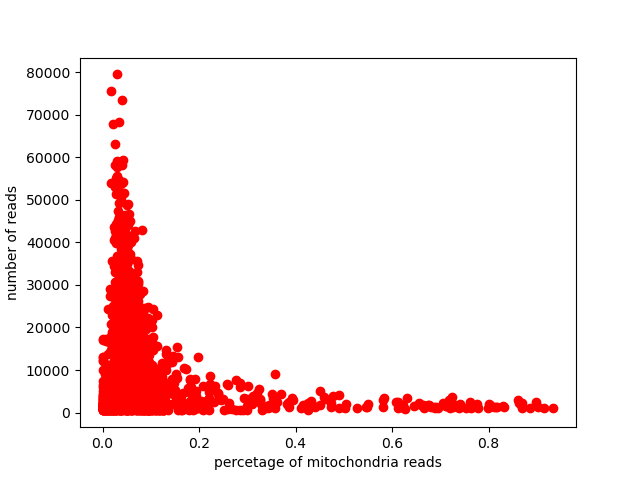

In [36]:
# select sample id
sample_id = 'M152'
# select the threshold you're interested in.
threshold_1 = 0.2
threshold_2 = 0.6


sample = fr'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\Data\droplet_seq\new_data_3.10.21\ROW_DATA\{sample_id}.pkl'
data = pickle.load(open(sample, 'rb'))
genes = data[3]#data.gene_names
counts = data[0]#data.counts
print(f'count shape {counts.shape}')
print(f'number of cells {counts.shape[0]}')
print(f'number of genes {counts.shape[1]}')


counting_reads = counts.sum(axis=1)
mitochondria_genes = counts[:, [s.startswith('MT-') for s in genes]].sum(axis=1)


# fig, axs = plt.subplots(1, 2)
# fig.set_size_inches(10, 5)

# Extract mitochondria content.
counting_reads = counting_reads.astype(np.float64)
mitochondria_genes = mitochondria_genes.astype(np.float64)
percetage_of_mitochondria = np.divide(mitochondria_genes, counting_reads, out=np.zeros_like(counting_reads), where=counting_reads!=0)


# 1. Histogram of percetage of mitochondria content.
# axs[0].hist(percetage_of_mitochondria, bins=100)
# axs[0].set_title("percetage of mitochondria reads")


threshold_1_text, _, _ = mitochondria_content_threshold(percetage_of_mitochondria, threshold_1)
threshold_2_text, _, _ = mitochondria_content_threshold(percetage_of_mitochondria, threshold_2)


# 2. Plot of  X - Percetage of mitochondria content. Y - Number of reads.
plt.plot(percetage_of_mitochondria, counting_reads, 'ro')

plt.ylabel('number of reads')
plt.xlabel('percetage of mitochondria reads')


# cutoff
# plt.plot([threshold_1], [0], 'bo')
# plt.annotate(f"Cutoff",xy=(0.13,2000), weight='bold')



plt.savefig(fr'C:\Users\KerenYlab\Desktop\{sample_id}_apoptosis.png')






############################## old:

# plt.annotate(f"{threshold_2} threshold",xy=(0.6,400), weight='bold')
# plt.text(0.45,4200, threshold_1_text,
#         verticalalignment='bottom', horizontalalignment='right',
#         color='black',weight='bold', fontsize=10)
# plt.text(0.95,4200, threshold_2_text,
#         verticalalignment='bottom', horizontalalignment='right',
#         color='black',weight='bold', fontsize=10)


